In [1]:
%%time
import glob, re
import cclib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%config InlineBackend.figure_format = 'retina'

# my color preferences
excel = "#0B9A6D"
k80 = "#333333"
k40 = "#999999"
def_color = k80

CPU times: user 2.71 s, sys: 668 ms, total: 3.38 s
Wall time: 5.39 s


In [2]:
# superficial stuff, you can skip this cell
# change some of the matplotlib defaults
from matplotlib import rcParams
rcParams['text.color'] = def_color
rcParams['axes.edgecolor'] = def_color
rcParams['axes.labelcolor'] = def_color
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = def_color
rcParams['scatter.edgecolors'] = def_color
rcParams['grid.color'] = def_color
rcParams['lines.color'] = def_color
rcParams['figure.facecolor'] = 'white'
rcParams['figure.edgecolor'] = 'white'
rcParams['savefig.facecolor'] = 'white'
rcParams['savefig.edgecolor'] = 'white'
rcParams['xtick.color'] = def_color
rcParams['ytick.color'] = def_color
rcParams['axes.labelcolor'] = def_color
rcParams['font.size'] = 12

In [3]:
# superficial stuff, you can skip this cell.
# if you want to use a specific font, you will need to specify where it is located in `font_dir`
from matplotlib import rcParams
import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['/Users/joe/Library/Fonts/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Montserrat'


In [4]:
paths = glob.glob('*.out') # read in the input files
print(len(paths)) # should return 7

7


In [5]:
# function to convert wavenumber to nanometers
def wavenumber_to_nm(wavenumber):
    nm = 1*10**7 / wavenumber
    return nm

In [6]:
dfMols_list = []

for path in paths:
    molecule_name = path.strip('output/').strip('-tddft.')  
    data = cclib.io.ccread(path)    # read in the output file with cclib
    wavenumber = data.etenergies[0] # extract the first (lowest energy) electronic transition
    lambda_dft = wavenumber_to_nm(wavenumber) #convert wavenumber to nanometers
    dfMols_list.append(pd.DataFrame({'molecule_name': [molecule_name], 'lambda_dft': [lambda_dft]})) # make a one-row dataframe and add it to list

dfMols = pd.concat(dfMols_list, ignore_index=True) # make each entry in the list into a new row in our new dataframe
dfMols

,molecule_name,lambda_dft
0,PhCOCN2COPh,378.889777
1,CN2H2,418.569413
2,PhNHCOCN2H,415.643145
3,PhCOCN2H,386.696107
4,EtCOCN2H,388.412867
5,EtO2CCN2H,396.311136
6,Ph2CN2H,523.387574


In [7]:
# make a working copy of the dataframe
df = dfMols.copy() 

# manually enter the experimetal data as a new column in our dataframe.
df['lamdba_experiment'] = [275, 417, 387, 294, 360, 364, 526]

# sort the dataframe by increasing wavelength
df = df.sort_values(by='lambda_dft')
df

,molecule_name,lambda_dft,lamdba_experiment
0,PhCOCN2COPh,378.889777,275
3,PhCOCN2H,386.696107,294
4,EtCOCN2H,388.412867,360
5,EtO2CCN2H,396.311136,364
2,PhNHCOCN2H,415.643145,387
1,CN2H2,418.569413,417
6,Ph2CN2H,523.387574,526


Text(0.1, 0.9, 'y = 0.55x + 208\nR² = 0.85')

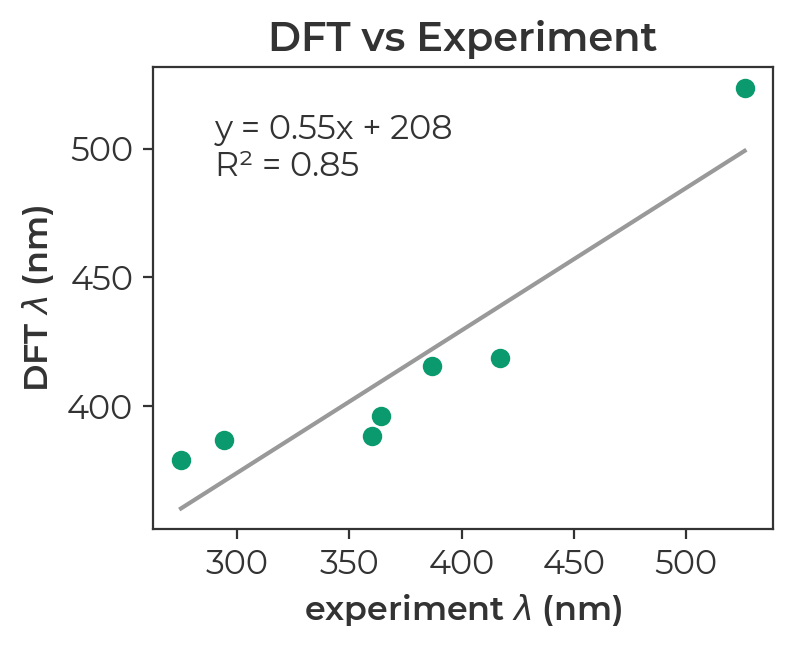

In [8]:
x = df['lamdba_experiment']
y = df['lambda_dft']

fig, (ax1) = plt.subplots(1, 1, figsize=(4,3))
scatter = ax1.scatter(x,y,color=excel)

m, b = np.polyfit(x, y, 1)
pred = x * m + b
r2 = r2_score(y, pred)
ax1.plot(x, pred, "-", color=k40, label='best fit')
ax1.set_xlabel(r'experiment $\lambda$ (nm)', fontweight='semibold')
ax1.set_ylabel(r'DFT $\lambda$ (nm)', fontweight='semibold')
ax1.set_title(r'DFT vs Experiment', fontweight='semibold')

text = f"y = {m:.2f}x + {b:.0f}\nR\u00b2 = {r2:.2f}"
ax1.text(0.1, 0.9, text, transform=ax1.transAxes, verticalalignment='top', horizontalalignment='left')
